In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import tree

sData = load_breast_cancer()
X = sData.data
y = sData.target
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [4]:
clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train) # 使用训练集训练
clf = clf.fit(X, y) # 使用所有样本进行训练
result = clf.predict(X_test) # 使用测试集测试
print(result)
print(y_test)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


In [5]:
# r = tree.export_text(clf, feature_names=sData['feature_names'])
r = tree.export_text(clf)
print(r)

|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.14
|   |   |--- feature_28 <= 0.16
|   |   |   |--- class: 0
|   |   |--- feature_28 >  0.16
|   |   |   |--- feature_13 <= 38.60
|   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  38.60
|   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_10 >  0.42
|   |   |   |   |   |--- feature_18 <= 0.02
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_

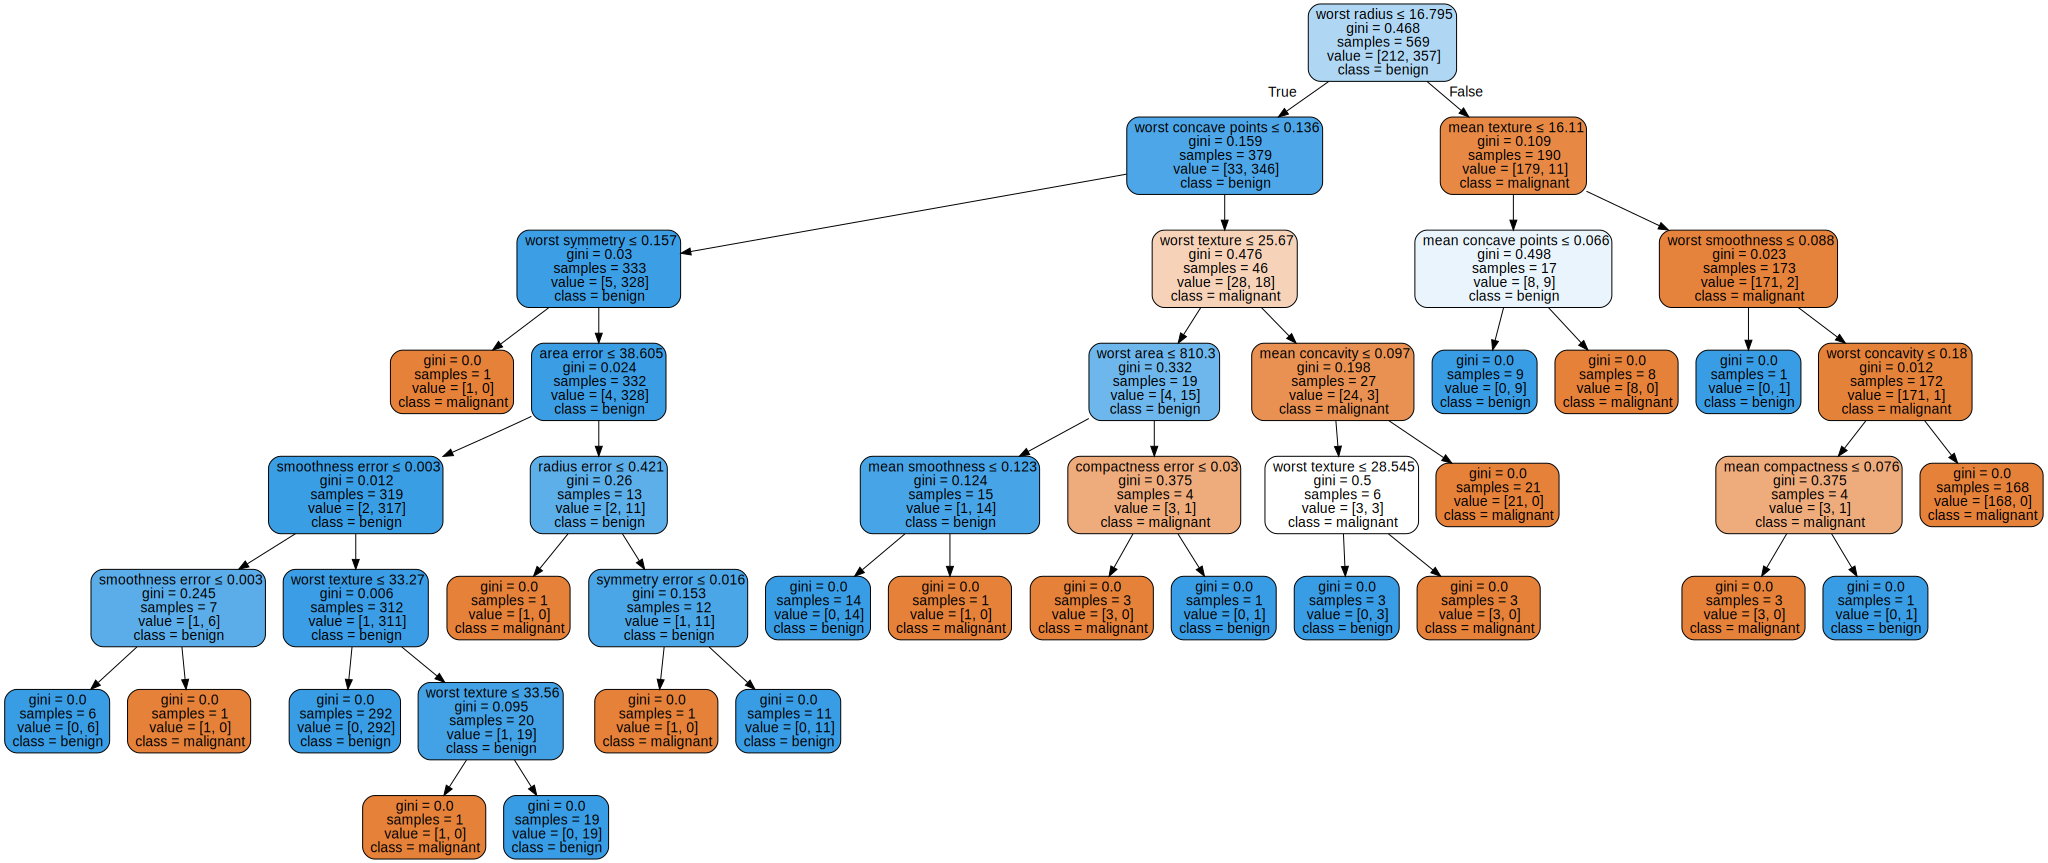

In [6]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
    feature_names=sData['feature_names'], 
    class_names=sData['target_names'],
    filled=True, rounded=True,
    special_characters=True)
graph = graphviz.Source(dot_data)
graph